In [28]:
import tensorflow as tf
from keras.datasets import cifar10
from keras import backend as K
import keras
from keras.models import load_model
from keras.applications import resnet50

import matplotlib.pyplot as plt
import numpy as np

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

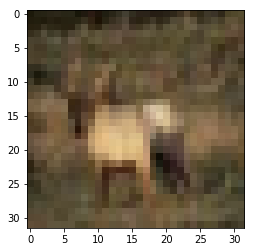

In [37]:
plt.imshow(x_train[3])

In [31]:
x_train[0].shape

(32, 32, 3)

In [32]:
l_model = load_model('cifar_model_test.h5')
l_model.trainable = False

def_model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
def_model.trainable = False

In [38]:
for i in range(10):
    image = x_train[i]
    image *= 255
    image = image[None, ...]
    image = image.reshape(1, 3, 32, 32)
    pred = l_model.predict(image)
    
    image = image.reshape(1, 32, 32, 3)
    image = tf.image.resize(image, (224, 224))
    
    pred2 = def_model.predict(image)
    print("image {} with true class {}.".format(i, y_train[i]))
    print(pred)
    print('Predicted:', resnet50.decode_predictions(pred2, top=3)[0])

image 0 with true class [6].
[[ 14.7795315 -16.033014   -7.024896    9.977897   11.22751   -16.16437
    7.8197002   4.074183    5.8869777 -14.540079 ]]
Predicted: [('n04286575', 'spotlight', 0.26314655), ('n03929660', 'pick', 0.16706955), ('n03825788', 'nipple', 0.10934507)]
image 1 with true class [9].
[[ 32.848934 -16.68403  -20.02214   18.785631  10.465119 -27.719837
   11.982898   9.619954   4.09353  -23.364048]]
Predicted: [('n03796401', 'moving_van', 0.7277919), ('n04266014', 'space_shuttle', 0.08141206), ('n03000247', 'chain_mail', 0.016487233)]
image 2 with true class [9].
[[ 71.24336    -2.2512615 -22.91233    23.007378   -5.255525  -22.599403
    9.016327   11.535552  -21.064     -40.7118   ]]
Predicted: [('n04428191', 'thresher', 0.5652591), ('n03000684', 'chain_saw', 0.070295684), ('n04456115', 'torch', 0.06083921)]
image 3 with true class [4].
[[ 13.996975   -11.512668    -7.125654     7.8541512    7.7730155
  -13.107083     6.7895236    5.304002     0.37762475 -10.347147